In [101]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn import mixture
from sklearn.decomposition import PCA

import pandas as pd

from scipy.stats import multivariate_normal

# Karate Club Network

Creator: "Mark Newman on Fri Jul 21 12:39:27 2006"
Number of vertices: 34
Number of edges: 78


/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


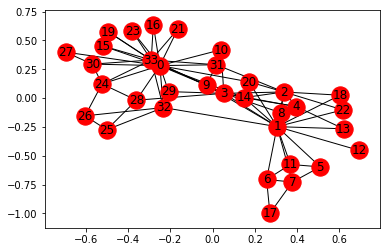

In [3]:
kn = nx.read_gml("data/karate-club.gml")

print("Creator: {}".format(kn.graph["Creator"].strip()))
print("Number of vertices: {}".format(kn.number_of_nodes()))
print("Number of edges: {}".format(kn.number_of_edges()))

nx.draw_networkx(kn)

# Gaussian Mixture

In [291]:
targets = [0, 1]

/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


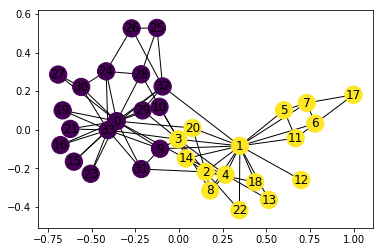

In [5]:
A = nx.adjacency_matrix(kn)
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
X_train = np.vstack(A.todense())

result = clf.fit_predict(X_train)

nx.draw_networkx(kn, node_color = result)

# Visualization based on our model in a 2D space (with PCA)

/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


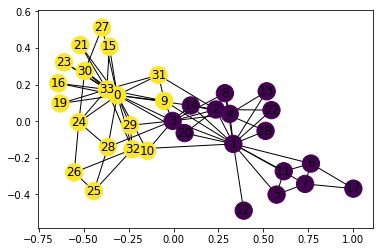

In [313]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

result = clf.fit_predict(principalComponents)

nx.draw_networkx(kn, node_color = result)

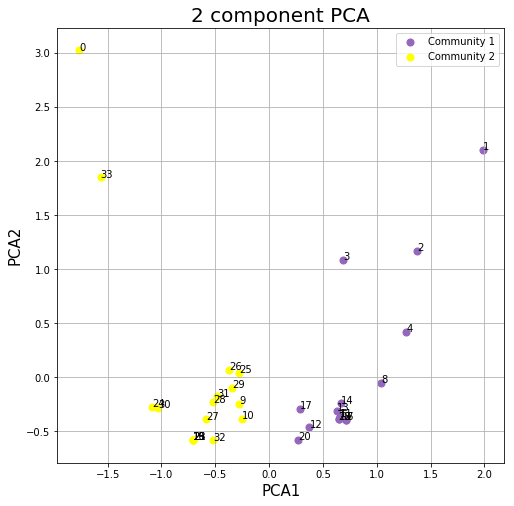

In [296]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["PCA1", "PCA2"])
principalDf['target'] = result

# print(principalDf)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel("PCA1", fontsize = 15)
ax.set_ylabel("PCA2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)

colors = ["tab:purple", 'yellow']

for target, color in zip(targets, colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, "PCA1"],
               principalDf.loc[indicesToKeep, "PCA2"],
               c = color,
               s = 50)

ax.legend(['Community 1', 'Community 2'])
ax.grid()

for i in range(len(result)):
    ax.annotate(i, (principalDf.loc[i, "PCA1"], principalDf.loc[i, "PCA2"]))

*This visualization gives us concise illustration of how 2 density centers are distant from each other.*

# Node embedding

In [41]:
# fh=open("data/karate-club.adjlist", "wb")
# nx.write_adjlist(kn, fh)

!deepwalk --input data/karate-club.adjlist --output data/karate-club.embeddings

Number of nodes: 34
Number of walks: 340
Data size (walks*length): 13600
Walking...
Training...


# Community Embedding

In [298]:
with open("data/karate-club.embeddings", "r") as f:
    skipgram = f.readlines()
    
print("Number of nodes: {} in {}-dimensional representation".format(*skipgram.pop(0).split()))

result = {}
for i in range(len(skipgram)):
    id, v = skipgram[i].split(" ", 1)
    result[int(id)] = v
    
result = dict(sorted(result.items()))

principalDf["v"] = result.values()

principalDf

Number of nodes: 34 in 64-dimensional representation


,PCA1,PCA2,target,v
0,-1.762821,3.026501,1,0.11931809 0.049004804 -0.3030079 0.16024871 -...
1,1.984795,2.104902,0,0.031653255 0.05426076 -0.27073342 0.082304716...
2,1.372776,1.173120,0,0.033394102 0.047542624 -0.35393476 0.19016054...
3,0.685953,1.085768,0,0.027739717 0.043210946 -0.30720377 0.18140353...
4,1.273040,0.419181,0,-0.0102774985 0.040102784 -0.32439432 0.178515...
5,0.657226,-0.362973,0,0.06713723 0.01882718 -0.26667592 0.02544315 -...
6,0.714948,-0.395922,0,0.093640015 0.02599442 -0.2472941 0.01804909 -...
7,0.714948,-0.395922,0,0.12572508 0.05581541 -0.2182042 0.019586494 -...
8,1.041168,-0.053247,0,-0.01927486 0.04036288 -0.3382046 0.18193732 -...
9,-0.276471,-0.244368,1,0.09163479 0.05901606 -0.3153482 0.13477063 -0...


In [306]:
def vectorize(row):
    return np.array(row.split(" ")).astype(float)

In [319]:
rvs = dict.fromkeys(targets)
result = dict.fromkeys(targets)

for target, color in zip(targets, colors):
    indicesToKeep = principalDf['target'] == target
    data = principalDf.loc[indicesToKeep, "v"].as_matrix()
    data = np.array([vectorize(row) for row in data])
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=0)
    rvs[target] = multivariate_normal(mean=mean, cov=cov, allow_singular=True)
    result[target] = [rvs[target].pdf(v) for v in data]
    
result

/Users/farewell/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


{0: [2107972298525363.0,
  2107972298524853.8,
  2107972298525243.2,
  2107972298525273.0,
  2107972298525198.2,
  2107972298525423.0,
  2107972298525363.0,
  2107972298525288.0,
  2107972298525108.2,
  2107972298525093.2,
  2107972298525378.0,
  2107972298524973.5,
  2107972298525303.0,
  2107972298525063.5,
  2107972298524988.5,
  2107972298524958.5],
 1: [3.4867034696705976e+18,
  3.4867034696702013e+18,
  3.4867034696704737e+18,
  3.486703469670548e+18,
  3.4867034696703744e+18,
  3.4867034696703744e+18,
  3.486703469670325e+18,
  3.4867034696707707e+18,
  3.4867034696703744e+18,
  3.4867034696703995e+18,
  3.486703469670672e+18,
  3.48670346967035e+18,
  3.486703469670548e+18,
  3.4867034696705976e+18,
  3.4867034696699284e+18,
  3.4867034696701517e+18,
  3.486703469670622e+18,
  3.486703469670548e+18]}

# Community Detection based on Node Embedding

In [324]:
def detect(v):
    p0 = rvs[0].pdf(v)
    p1 = rvs[1].pdf(v)
    return (0, p0) if p0 > p1 else (1, p1)

In [325]:
for id, row in principalDf.iterrows():
    v = vectorize(row["v"])
    t, p = detect(v)
    print("{}: {} ({}), {}".format(id, t, row["target"] == t, p))

0: 1 (True), 3.4867034696705976e+18
1: 0 (True), 2107972298525363.0
2: 0 (True), 2107972298524853.8
3: 0 (True), 2107972298525243.2
4: 0 (True), 2107972298525273.0
5: 0 (True), 2107972298525198.2
6: 0 (True), 2107972298525423.0
7: 0 (True), 2107972298525363.0
8: 0 (True), 2107972298525288.0
9: 1 (True), 3.4867034696702013e+18
10: 1 (True), 3.4867034696704737e+18
11: 0 (True), 2107972298525108.2
12: 0 (True), 2107972298525093.2
13: 0 (True), 2107972298525378.0
14: 0 (True), 2107972298524973.5
15: 1 (True), 3.486703469670548e+18
16: 1 (True), 3.4867034696703744e+18
17: 0 (True), 2107972298525303.0
18: 0 (True), 2107972298525063.5
19: 1 (True), 3.4867034696703744e+18
20: 1 (False), 1.9877617502429133e+17
21: 1 (True), 3.486703469670325e+18
22: 0 (True), 2107972298524958.5
23: 1 (True), 3.4867034696707707e+18
24: 1 (True), 3.4867034696703744e+18
25: 1 (True), 3.4867034696703995e+18
26: 1 (True), 3.486703469670672e+18
27: 1 (True), 3.48670346967035e+18
28: 1 (True), 3.486703469670548e+18
29